In [1]:
import gluonts
gluonts.__version__

'0.4.2'

In [2]:
import mxnet
mxnet.__version__

'1.4.1'

In [3]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [4]:
dataname = "m4_weekly"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:downloading and processing m4_weekly


saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/test/data.json


In [5]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_hourly', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_finance', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_finance', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_quarterly_other', 'm4_weekly', 'my_weekly_tm', 'm4_yearly', 'm4_yearly_demographic', 'm4_yearly_finance', 'm4_yearly_industry', 'm4_yearly_macro', 'm4_yearly_micro', 'm4_yearly_other']


In [6]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])


In [7]:
train_entry

{'start': Timestamp('1750-01-04 00:00:00', freq='W-SUN'),
 'target': array([ 1089.2 ,  1078.91,  1079.88, ..., 36565.18, 36565.18, 35397.16],
       dtype=float32),
 'feat_static_cat': array([0], dtype=int32),
 'source': SourceContext(source=Span(path=PosixPath('/home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json'), line=1), row=1)}

## Plot Series

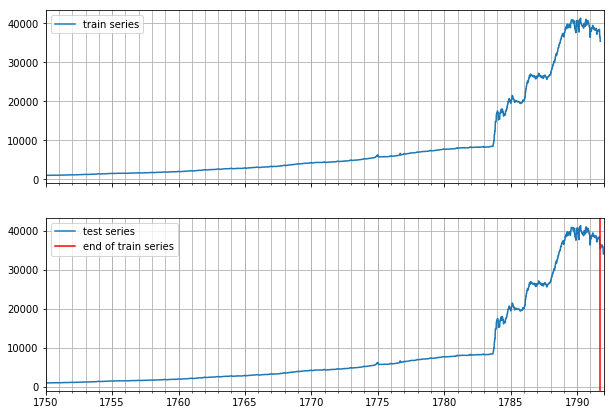

In [8]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [9]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator


In [10]:
# %%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_yearly", seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 1179723


Seed: 42


100%|██████████| 100/100 [00:03<00:00, 27.53it/s, avg_epoch_loss=8.14]
INFO:root:Epoch[0] Elapsed time 3.637 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.140023
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 27.63it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[1] Elapsed time 3.622 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.816145
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 27.25it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[2] Elapsed time 3.677 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.890125
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 27.35it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[3] Elapsed time 3.661 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.256244
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 27.87it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[4] Elapsed time 3.593 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:03<00:00, 31.78it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[73] Elapsed time 3.151 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.536370
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 30.24it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[74] Elapsed time 3.312 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.323503
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 29.42it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[75] Elapsed time 3.402 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.575580
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 30.48it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[76] Elapsed time 3.288 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.815035
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 29.53it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[77] Elapsed time 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.472221  0.142274  66.724909            0.136339            0.090187   

   seed  epochs  num_batches  
0    42     100          100  
Seed: 43


100%|██████████| 100/100 [00:03<00:00, 30.44it/s, avg_epoch_loss=8.19]
INFO:root:Epoch[0] Elapsed time 3.290 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.190277
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.00it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[1] Elapsed time 3.127 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.827358
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 28.97it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[2] Elapsed time 3.461 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.845663
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 30.79it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[3] Elapsed time 3.251 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.236609
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 32.08it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[4] Elapsed time 3.120 seconds
INFO:root:E

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.600651
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:03<00:00, 31.65it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[74] Elapsed time 3.167 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.149501
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:03<00:00, 31.53it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[75] Elapsed time 3.174 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.422077
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:03<00:00, 33.33it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[76] Elapsed time 3.004 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.868392
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 30.86it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[77] Elapsed time 3.246 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.3762

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.457359  0.143118  68.041644            0.135773             0.09193   

   seed  epochs  num_batches  
0    43     100          100  
Seed: 44


100%|██████████| 100/100 [00:03<00:00, 26.37it/s, avg_epoch_loss=7.97]
INFO:root:Epoch[0] Elapsed time 3.798 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.970582
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 28.07it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[1] Elapsed time 3.570 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.801754
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 26.41it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[2] Elapsed time 3.789 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.831550
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 27.10it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[3] Elapsed time 3.694 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.253385
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 28.50it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[4] Elapsed time 3.516 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:03<00:00, 27.05it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[73] Elapsed time 3.706 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.575468
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 27.04it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[74] Elapsed time 3.702 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.256841
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 27.62it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 3.627 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.552120
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 29.39it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[76] Elapsed time 3.406 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.922695
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 25.97it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[77] Elapsed time 

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.406039  0.14292  64.838764            0.136898             0.09332    44   

   epochs  num_batches  
0     100          100  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,3.472221,0.142274,66.724909,0.136339,0.090187,42,100,100
0,3.457359,0.143118,68.041644,0.135773,0.091930,43,100,100
0,3.406039,0.142920,64.838764,0.136898,0.093320,44,100,100


In [ ]:
results = pd.DataFrame()
df = deepar(data="m4_monthly_industry", seed=44, epochs=314, batches=200)
pprint(df)
results = results.append(df)

results

In [17]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_micro", seed=i, epochs=343, batches=200)
    pprint(df)
    results = results.append(df)

results

In [16]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_micro", seed=i, epochs=172, batches=200)
    pprint(df)
    results = results.append(df)

results

In [15]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly_micro", seed=i, epochs=343, batches=100)
    pprint(df)
    results = results.append(df)

results